In [1]:
# Copyright Elasticsearch B.V. and/or licensed to Elasticsearch B.V. under one
# or more contributor license agreements. Licensed under the Elastic License;
# you may not use this file except in compliance with the Elastic License.

In [2]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False
import skmultiflow
import sklearn.datasets
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import sys
sys.path.append('..')
from utils.misc import *

## Sine function with gap

In [5]:
x = np.random.random(2000).reshape((-1,2))
y = x[:,1] < (np.sin(x[:,0]*np.pi/2*4)+1)/2

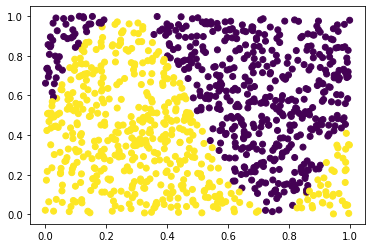

In [6]:
plt.scatter(x[:,0], x[:,1], c=y)

In [7]:
gap_mask = (x[:, 0] < 0.3) | (x[:,0] > 0.7) | (x[:,1] < 0.3) | (x[:,1] > 0.7)
x_with_gap = x[gap_mask,:]
y_with_gap = y[gap_mask]

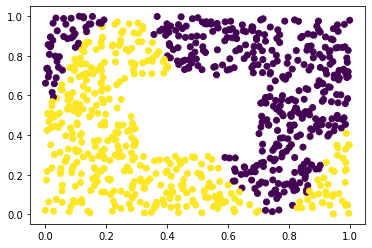

In [8]:
plt.scatter(x_with_gap[:,0], x_with_gap[:,1], c=y_with_gap)

In [91]:
dataset_name = 'classification-2d'
D1 = pd.DataFrame(data=x_with_gap, 
                  columns=['x1', 'x2'])
D1['target'] = y_with_gap 

In [92]:
D1.dtypes

x1        float64
x2        float64
target       bool
dtype: object

In [93]:
D1['target'].replace({True:'true', False:'false'}, inplace=True)

In [94]:
D1

,x1,x2,target
0,0.473177,0.778332,false
1,0.215235,0.100412,true
2,0.767378,0.346203,false
3,0.017428,0.844921,false
4,0.911504,0.658444,false
...,...,...,...
816,0.177683,0.965624,false
817,0.902811,0.741069,false
818,0.470353,0.741786,false
819,0.494759,0.047101,true


In [109]:
job1 = train(dataset_name, D1)

session: job_ilwxk	command:
/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpitl17thf --config /tmp/tmpg2za2491 --output /tmp/tmpxfh1mts_ --persist /tmp/tmp53_sd42d; if [ $? -eq 0 ]; then echo "Success"; else echo "Failure";  fi;


In [110]:
job1.wait_to_complete()

stderr,output
"/home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpitl17thf --config /tmp/tmpg2za2491 --output /tmp/tmpxfh1mts_ --persist /tmp/tmp53_sd42d; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/evaluation_scenarios [incremental-learning-datasets L|✚ 2…3⚑ 5] 14:58 $ /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpitl17thf --config /tmp/tmpg2za2491 --output /tmp/tmpxfh1mts_ --persist /tmp/tmp53_sd42d; if [ $? -eq 0 ]; then echo ""Success""; else echo ""Failure""; fi 2021-06-21 12:58:53,989737 UTC [16442] DEBUG Main.cc@145 data_frame_analyzer (64 bit): Version 8.0.0-SNAPSHOT (Build da3007f761335f) Copyright (c) 2021 Elasticsearch BV 2021-06-21 12:58:53,989779 UTC [16442] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /proc/self/oom_score_adj 2021-06-21 12:58:53,989789 UTC [16442] DEBUG CSystemCallFilter_Linux.cc@128 Seccomp BPF filters available 2021-06-21 12:58:53,990543 UTC [16442] DEBUG CSystemCallFilter_Linux.cc@154 Seccomp BPF installed 2021-06-21 12:58:53,990797 UTC [16442] FATAL CLogger.cc@405 Input error: expected 2 field values and got [0.47317687578146095, 0.7783317994569543, false]. Please report this problem. Failure (env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/evaluation_scenarios [incremental-learning-datasets L|✚ 2…3⚑ 5] 14:58 $",


 /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpitl17thf --config /tmp/tmpg2za2491 --output /tmp/tmpxfh1mts_ --persist /tmp/tmp53_sd42d; if [ $? -eq 0 ]; then echo "Success"; else echo "Failure";  fi
(env) ✔ ~/Documents/workspace/valeriy42/ml-cpp/jupyter/notebooks/evaluation_scenarios [incremental-learning-datasets L|✚ 2…3⚑ 5]
14:58 $  /home/valeriy/Documents/workspace/valeriy42/ml-cpp/build/distribution/platform/linux-x86_64/bin/data_frame_analyzer --input /tmp/tmpitl17thf --config /tmp/tmpg2za2491 --output /tmp/tmpxfh1mts_ --persist /tmp/tmp53_sd42d; if [ $? -eq 0 ]; then echo "Success"; else echo "Failure";  fi
2021-06-21 12:58:53,989737 UTC [16442] DEBUG Main.cc@145 data_frame_analyzer (64 bit): Version 8.0.0-SNAPSHOT (Build da3007f761335f) Copyright (c) 2021 Elasticsearch BV
2021-06-21 12:58:53,989779 UTC [16442] DEBUG CProcessPriority_Linux.cc@33 Successfully increased OOM killer adjustment via /

False

## Three circles

In [81]:
def sample_circle(size, center, radius, noise_scale):
    phi = np.random.uniform(0.0, 2*np.pi, size)
    noise = np.random.normal(0.0, noise_scale, 2*size).reshape(-1,2)
    x = np.array([radius*np.cos(phi)+center[0]+noise[:,0], radius*np.sin(phi)+center[1]+noise[:,1]])
    return x.T

In [94]:
x_base = sample_circle(1000, (0.5, 0.5), 0.2, 0.01)
y_base = np.ones(x_base.shape[0])
x_outer = sample_circle(1000, (0.5, 0.5), 0.4, 0.01)
y_outer = np.zeros(x_outer.shape[0])
x_inner = sample_circle(1000, (0.5, 0.5), 0.05, 0.01)
y_inner = np.zeros(x_inner.shape[0])
x = np.concatenate([x_base,x_outer,x_inner])
y = np.concatenate([y_base, y_outer, y_inner])

(0.0, 1.0)

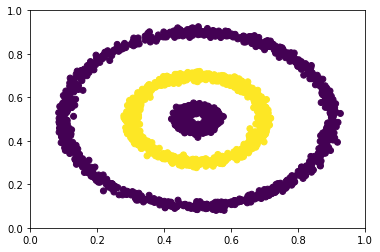

In [95]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlim(0,1)
plt.ylim(0,1)

### Regression 

In [134]:
size = 3000
low = -np.pi
high = np.pi
x = np.random.uniform(low, high, 2*size).reshape(size, -1)
y = np.sin((x[:,0])**2+x[:,1]**2)
x = (x-low)/(high-low)

(0.0, 1.0)

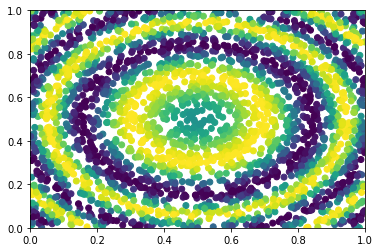

In [135]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlim(0,1)
plt.ylim(0,1)

In [100]:
np.min(x)

0.00030696724792278474

Text(0.5, 1.0, 'Original dataset')

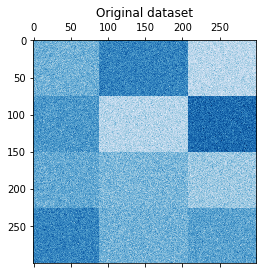

In [8]:

n_clusters = (4, 3)
data, rows, columns = sklearn.datasets.make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10,
    shuffle=False, random_state=0)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

In [20]:
X

array([[28.29617876, 28.29617876, 28.29617876, ..., 23.56253069,
        23.56253069, 23.56253069],
       [28.29617876, 28.29617876, 28.29617876, ..., 23.56253069,
        23.56253069, 23.56253069],
       [28.29617876, 28.29617876, 28.29617876, ..., 23.56253069,
        23.56253069, 23.56253069],
       ...,
       [73.14669323, 73.14669323, 73.14669323, ..., 86.38507683,
        86.38507683, 86.38507683],
       [73.14669323, 73.14669323, 73.14669323, ..., 86.38507683,
        86.38507683, 86.38507683],
       [73.14669323, 73.14669323, 73.14669323, ..., 86.38507683,
        86.38507683, 86.38507683]])